In [4]:
#Import python libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt
from collections import Counter
from keras.datasets import cifar10

In [5]:
#Load cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
#Reshape for knn
x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

In [7]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [8]:
#Function for displaying images
def display_image(image):
    # Reshape the image to its original dimensions: 32x32x3
    image = image.reshape((32, 32, 3))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [9]:
# Label - Image type mapping
categories = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [10]:
#compute custom similarity of v1 to v2
def custom_similarity(v1,v2):
    v1=np.array(v1, dtype=np.float128)
    v2=np.array(v2, dtype=np.float128)
    expV2=np.exp(v2)
    expV1=np.exp(v1)
    dot1=np.dot(expV1,expV2)
     # Compute first parameter of similarity
    p1= dot1 / (np.linalg.norm(expV1)* np.linalg.norm(expV2))
    # Compute second parameter of similarity
    p2= np.sqrt(np.dot(v1,v2.T)) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    # Compute and return similarity
    return p1 + p2

In [19]:
#''' This function is used to classify sample_test using KNN algorithm and cifar data set.
#Custom similarity is used for distance.
#
#        Args:
#        x_train: is a matrix which consists cifar dataset
#        y_train: includes class information from 0 to 9
#        sample_test: is vector form of test
#        k: is the nearest neighbor size
#
#        Returns:
#        The return value is class name (0-9)
#'''
def knnCustomSimilarity(x_train, y_train, sample_test, k ):
    dx,dy = x_train.shape
    distance = np.zeros((dx,1))
    class_count =  np.zeros((10,1))

    #cosine similarity between sample_test and x_train is calculated and dasitance array holds values
    for i in range (0,dx):
        d=custom_similarity(sample_test,x_train[i,:])

        distance[i,0] = d

    #y_train vector is added to last column of distance vector and then distance is sorted from large to small
    distance=np.hstack((distance,y_train))
    sortedDis = distance[distance[:,0].argsort()[::-1][:dx]]

    #first k biggest distance values is counted to detect which class is more
    for i in range(k):
        x=int(sortedDis[i,1])
        class_count[x,0] = class_count[x,0] + 1

    #counted class number is sorted to find class_name. max_index_col holds class name
    max_index_col = np.argmax(class_count, axis=0)

    #return class name
    return max_index_col



*************************************************PICTURE FROM TEST DATA , ITS ACTUAL LABEL AND KNN RESULT IS BELOW.(K=5)*************************************************
Actual Class Label: [6]
Actual Class Label name corresponding to the main class:  frog
Predicted Class Label: [6]
Predicted Class Label name corresponding to the main class:  frog


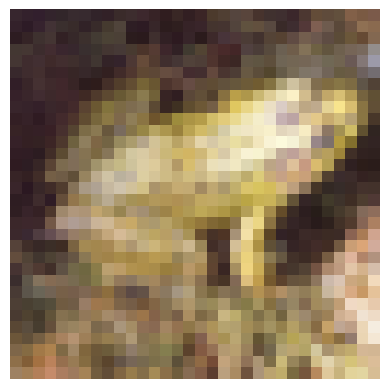

In [21]:
#TEST CODE 1
print("*************************************************PICTURE FROM TEST DATA , ITS ACTUAL LABEL AND KNN RESULT IS BELOW.(K=5)*************************************************")
sample_test = x_test[19,:]
k=5
print("Actual Class Label:", y_test[19])
print("Actual Class Label name corresponding to the main class: ",categories[y_test[19][0]])
similar_class_name = knnCustomSimilarity(x_train, y_train, sample_test, k )
print("Predicted Class Label:", similar_class_name)
print("Predicted Class Label name corresponding to the main class: ",categories[similar_class_name[0]])
display_image(sample_test)